In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 62

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
14281,00093081201,1,PillProjectDisc107/images/XX1PA78UZ9Y7BJW0SMZ5...,C3PI_Reference,NORTRIPTYLINE 50MG CAP,PillProjectDisc107,images,XX1PA78UZ9Y7BJW0SMZ5M893S6W9PS.CR2,.CR2
14282,00093081201,1,PillProjectDisc10/images/70C9EWQIXBAHE3S57QIG_...,C3PI_Reference,NORTRIPTYLINE 50MG CAP,PillProjectDisc10,images,70C9EWQIXBAHE3S57QIG_AX2OKGB15.CR2,.CR2
14283,00093081201,1,PillProjectDisc49/images/BVMAAVVLBV3-U!H!_8HU7...,C3PI_Reference,NORTRIPTYLINE HYDROCHLORIDE,PillProjectDisc49,images,BVMAAVVLBV3-U!H!_8HU77E9AHZGNCC.CR2,.CR2
14284,00093081201,1,PillProjectDisc88/images/GH07UNEOMW2Z21KNMXH2M...,C3PI_Reference,NORTRIPTYLINE HYDROCHLORIDE,PillProjectDisc88,images,GH07UNEOMW2Z21KNMXH2M0AKNHPUC-.CR2,.CR2
14285,00093081201,1,PillProjectDisc105/images/VGUVAWL82SQ7BK5RSBVJ...,C3PI_Test,NORTRIPTYLINE HYDROCHLORIDE,PillProjectDisc105,images,VGUVAWL82SQ7BK5RSBVJ2WTAQX252J.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
128168,68180051703,1,PillProjectDisc80/images/CVHMDM9H-GL8SV-M1A_Q6...,MC_CHALLENGE_V1.0,LISINOPRIL 40MG TAB,PillProjectDisc80,images,CVHMDM9H-GL8SV-M1A_Q6CYDHUIDVP5.JPG,.JPG
128169,68180051703,1,PillProjectDisc1/images/!YBV4TBPI8!3K2CDW2E7LU...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG TAB,PillProjectDisc1,images,!YBV4TBPI8!3K2CDW2E7LUEP_R2L9X.PNG,.PNG
128170,68180051703,1,PillProjectDisc28/images/BC93!WGT37J7FMZTI9NOF...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG TAB,PillProjectDisc28,images,BC93!WGT37J7FMZTI9NOFESI_W9E1CM.PNG,.PNG
128171,68180051703,1,PillProjectDisc49/images/BW0!6SCGTNRWGKKUTX9N5...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG TAB,PillProjectDisc49,images,BW0!6SCGTNRWGKKUTX9N5FCS2G0FT5A.PNG,.PNG


In [5]:
dfn.DRUG.value_counts()

FEXOFEN/PSE 24 HOUR TAB            62
LEVOTHYROXINE 0.1MG TAB            62
LISINOPRIL 40MG TAB                62
GLYBURIDE AND METFORMIN 5/500MG    62
LEVOTHYROXIN 137MCG TAB            62
HYDROXYCHLOR 200MG TAB             62
GLYBURIDE 2.5MG TAB                62
BUMETANIDE TABLETS USP             34
NORTRIPTYLINE HYDROCHLORIDE        32
NORTRIPTYLINE 50MG CAP             30
BUMETANIDE 0.5MG TABLETS           28
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(9,
 00093834305    62
 00093423201    62
 00527163801    62
 68180051703    62
 00093081201    62
 55111057201    62
 00591069801    62
 00527134510    62
 00093571205    62
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,BUMETANIDE 0.5MG TABLETS,00093423201
1,BUMETANIDE TABLETS USP,00093423201
2,FEXOFEN/PSE 24 HOUR TAB,55111057201
3,GLYBURIDE 2.5MG TAB,00093834305
4,GLYBURIDE AND METFORMIN 5/500MG,00093571205
5,HYDROXYCHLOR 200MG TAB,00591069801
6,LEVOTHYROXIN 137MCG TAB,00527163801
7,LEVOTHYROXINE 0.1MG TAB,00527134510
8,LISINOPRIL 40MG TAB,68180051703
9,NORTRIPTYLINE 50MG CAP,00093081201


In [8]:
droplist = ['']

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00093423201'] = 'BUMETANIDE 0.5MG'
df.DRUG[df.NDC == '55111057201'] = 'FEXOFEN/PSE'
df.DRUG[df.NDC == '00093834305'] = 'GLYBURIDE 2.5MG'
df.DRUG[df.NDC == '00093571205'] = 'GLYBURIDE/METFORMIN 5/500MG'
df.DRUG[df.NDC == '00591069801'] = 'HYDROXYCHLOR 200MG'
df.DRUG[df.NDC == '00527163801'] = 'LEVOTHYROXIN 137MCG'
df.DRUG[df.NDC == '00527134510'] = 'LEVOTHYROXINE 0.1MG '
df.DRUG[df.NDC == '68180051703'] = 'LISINOPRIL 40MG'
df.DRUG[df.NDC == '00093081201'] = 'NORTRIPTYLINE 50MG'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
14281,00093081201,1,PillProjectDisc107/images/XX1PA78UZ9Y7BJW0SMZ5...,C3PI_Reference,NORTRIPTYLINE 50MG,PillProjectDisc107,images,XX1PA78UZ9Y7BJW0SMZ5M893S6W9PS.CR2,.CR2
14282,00093081201,1,PillProjectDisc10/images/70C9EWQIXBAHE3S57QIG_...,C3PI_Reference,NORTRIPTYLINE 50MG,PillProjectDisc10,images,70C9EWQIXBAHE3S57QIG_AX2OKGB15.CR2,.CR2
14283,00093081201,1,PillProjectDisc49/images/BVMAAVVLBV3-U!H!_8HU7...,C3PI_Reference,NORTRIPTYLINE 50MG,PillProjectDisc49,images,BVMAAVVLBV3-U!H!_8HU77E9AHZGNCC.CR2,.CR2
14284,00093081201,1,PillProjectDisc88/images/GH07UNEOMW2Z21KNMXH2M...,C3PI_Reference,NORTRIPTYLINE 50MG,PillProjectDisc88,images,GH07UNEOMW2Z21KNMXH2M0AKNHPUC-.CR2,.CR2
14285,00093081201,1,PillProjectDisc105/images/VGUVAWL82SQ7BK5RSBVJ...,C3PI_Test,NORTRIPTYLINE 50MG,PillProjectDisc105,images,VGUVAWL82SQ7BK5RSBVJ2WTAQX252J.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
128168,68180051703,1,PillProjectDisc80/images/CVHMDM9H-GL8SV-M1A_Q6...,MC_CHALLENGE_V1.0,LISINOPRIL 40MG,PillProjectDisc80,images,CVHMDM9H-GL8SV-M1A_Q6CYDHUIDVP5.JPG,.JPG
128169,68180051703,1,PillProjectDisc1/images/!YBV4TBPI8!3K2CDW2E7LU...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG,PillProjectDisc1,images,!YBV4TBPI8!3K2CDW2E7LUEP_R2L9X.PNG,.PNG
128170,68180051703,1,PillProjectDisc28/images/BC93!WGT37J7FMZTI9NOF...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG,PillProjectDisc28,images,BC93!WGT37J7FMZTI9NOFESI_W9E1CM.PNG,.PNG
128171,68180051703,1,PillProjectDisc49/images/BW0!6SCGTNRWGKKUTX9N5...,MC_COOKED_CALIBRATED_V1.2,LISINOPRIL 40MG,PillProjectDisc49,images,BW0!6SCGTNRWGKKUTX9N5FCS2G0FT5A.PNG,.PNG


In [11]:
df.DRUG.value_counts()

BUMETANIDE 0.5MG               62
HYDROXYCHLOR 200MG             62
LEVOTHYROXIN 137MCG            62
GLYBURIDE 2.5MG                62
NORTRIPTYLINE 50MG             62
GLYBURIDE/METFORMIN 5/500MG    62
LEVOTHYROXINE 0.1MG            62
FEXOFEN/PSE                    62
LISINOPRIL 40MG                62
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,BUMETANIDE 0.5MG,00093423201
1,FEXOFEN/PSE,55111057201
2,GLYBURIDE 2.5MG,00093834305
3,GLYBURIDE/METFORMIN 5/500MG,00093571205
4,HYDROXYCHLOR 200MG,00591069801
5,LEVOTHYROXIN 137MCG,00527163801
6,LEVOTHYROXINE 0.1MG,00527134510
7,LISINOPRIL 40MG,68180051703
8,NORTRIPTYLINE 50MG,00093081201


## Sample Batch

In [13]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00093081201,1,PillProjectDisc1/images/!NESKAJ-EQBNYD-EK-2SJW...,C3PI_Reference,NORTRIPTYLINE 50MG,PillProjectDisc1,images,!NESKAJ-EQBNYD-EK-2SJWV_JVAJ5C.JPG,.CR2
1,00093423201,1,PillProjectDisc1/images/!BRDBA1X3L31OUJGSI-_IJ...,C3PI_Reference,BUMETANIDE 0.5MG,PillProjectDisc1,images,!BRDBA1X3L31OUJGSI-_IJF567FMR2.PNG,.CR2
2,00093571205,1,PillProjectDisc1/images/!26B-SRSX9AKRBYYG6AGWI...,C3PI_Reference,GLYBURIDE/METFORMIN 5/500MG,PillProjectDisc1,images,!26B-SRSX9AKRBYYG6AGWI8HB49Y2J.JPG,.CR2
3,00093834305,1,PillProjectDisc1/images/!EZRY0QO5CA77Y0NO53GTM...,C3PI_Reference,GLYBURIDE 2.5MG,PillProjectDisc1,images,!EZRY0QO5CA77Y0NO53GTM5YSQ2IDM.JPG,.CR2
4,00527134510,1,PillProjectDisc100/images/RKLJYGOPJEHZ_0OFS025...,C3PI_Reference,LEVOTHYROXINE 0.1MG,PillProjectDisc100,images,0O8AVELYT6_J5_K_QFGS8L3-QWZR99.JPG,.CR2
5,00527163801,1,PillProjectDisc102/images/SRIPJKAQ5B6ARIL1WB4E...,C3PI_Reference,LEVOTHYROXIN 137MCG,PillProjectDisc102,images,-AFKR0ENSBBLTHQYZBO_68!RVPXXEA.JPG,.CR2
6,00591069801,1,PillProjectDisc10/images/6Q5_U76CCUL!-VBQW0RJV...,C3PI_Reference,HYDROXYCHLOR 200MG,PillProjectDisc10,images,1I2U0GD__JQU1HFU74QQLVWYKVPH3K.CR2,.CR2
7,55111057201,1,PillProjectDisc1/images/!GYWQD_JY2WO913RH7E71O...,C3PI_Reference,FEXOFEN/PSE,PillProjectDisc1,images,!GYWQD_JY2WO913RH7E71O0A89K1S0.JPG,.CR2
8,68180051703,1,PillProjectDisc1/images/!N2SM_QTD19T59JW9_MRZC...,C3PI_Reference,LISINOPRIL 40MG,PillProjectDisc1,images,!N2SM_QTD19T59JW9_MRZCHJRURUNF.JPG,.CR2


In [14]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!26B-SRSX9AKRBYYG6AGWI8HB49Y2J.JPG',
 'PillProjectDisc1/images/!BRDBA1X3L31OUJGSI-_IJF567FMR2.PNG',
 'PillProjectDisc1/images/!EZRY0QO5CA77Y0NO53GTM5YSQ2IDM.JPG',
 'PillProjectDisc1/images/!GYWQD_JY2WO913RH7E71O0A89K1S0.JPG',
 'PillProjectDisc1/images/!N2SM_QTD19T59JW9_MRZCHJRURUNF.JPG',
 'PillProjectDisc1/images/!NESKAJ-EQBNYD-EK-2SJWV_JVAJ5C.JPG',
 'PillProjectDisc10/images/6Q5_U76CCUL!-VBQW0RJV0T1P-K442.JPG',
 'PillProjectDisc100/images/RKLJYGOPJEHZ_0OFS0255QSXJ!WRSW.JPG',
 'PillProjectDisc102/images/SRIPJKAQ5B6ARIL1WB4EDQDPSTV5FB.JPG']

In [15]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

4

In [16]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

! cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data
img62 img62/img62
/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img62


In [45]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img67'

In [17]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img62/img62


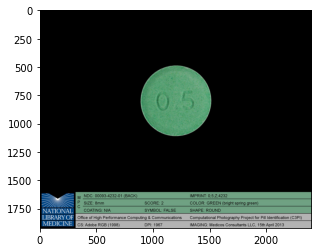

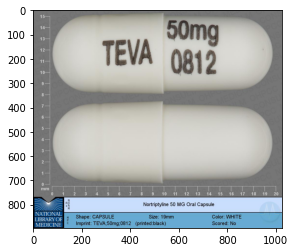

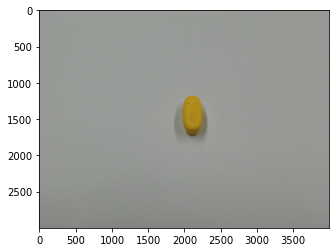

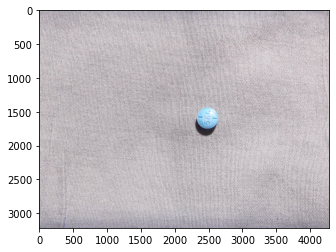

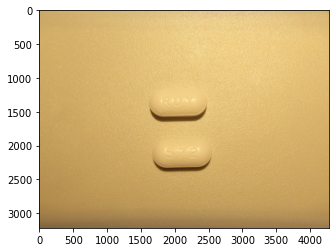

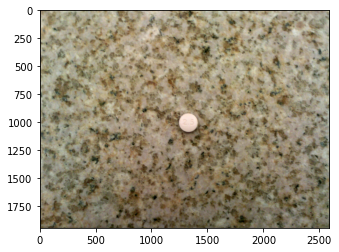

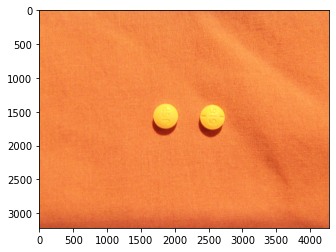

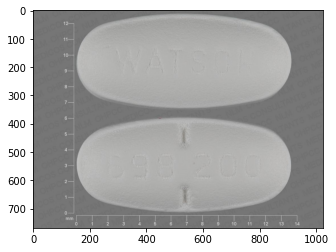

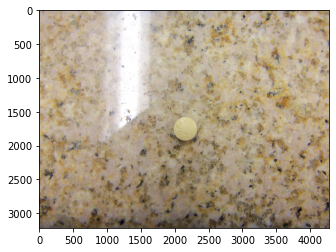

In [18]:
%cd $folder

images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [22]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')